In [21]:
#%pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#pip install seaborn
import seaborn as sns
%matplotlib inline

In [22]:
# Importing the dataset and extracting the features and target variable
path = r'C:\Users\patro\OneDrive\Education\Master of Science in Business Analytics (MSBA)\Courses\Phyton\Data\1000_Companies.csv'
companies = pd.read_csv(path)
x = companies.iloc[:, :-1].values  # Features (all columns except the last)
y = companies.iloc[:, 4].values  # Target variable (the last column)

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

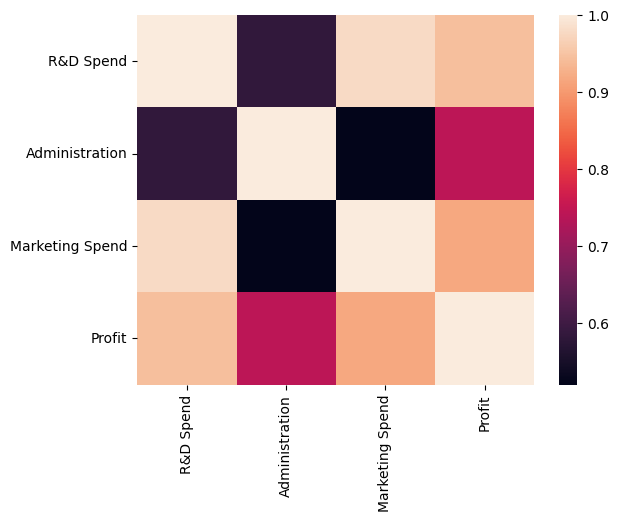

In [23]:
# Data visualization
# Correlation matrix
sns.heatmap(companies.select_dtypes(include=[np.number]).corr())
#sns.heatmap(companies.corr())

In [24]:
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#x[:, 3] = labelencoder.fit_transform(x[:, 3])  # Encoding 'State' column

#onehotencoder = OneHotEncoder(categorical_features = [3])
#x = onehotencoder.fit_transform(x).toarray()
#print(x)

In [25]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])  # Encoding 'State' column

# One-hot encoding using ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = ct.fit_transform(x)
#print(x[0])

In [26]:
x = x[:, 1:]  # Avoiding the first column after one-hot encoding

In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [29]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)
y_pred

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.2293644 ,  91473.37719687,
       164597.05380606,  53222.82667402,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.91053061,  75316.28143051,
       118248.14406603, 164574.40699901, 170937.2898107 , 182069.11645084,
       118845.03252689,  85669.95112229, 180992.59396143,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669091,  56881.41475225,
        68896.39346905, 210040.00765883, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130747, 174644.26529204, 117671.49128195,
        96731.37857434, 165452.25779409, 107724.34331255,  50194.54176914,
       116513.89532179,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

In [35]:
# Calcualting the Coefficient
regressor.coef_

array([-8.80536598e+02, -6.98169073e+02,  5.25845857e-01,  8.44390881e-01,
        1.07574255e-01])

In [36]:
# Calculacting the intercept
regressor.intercept_

np.float64(-51035.22972403464)

In [37]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268834

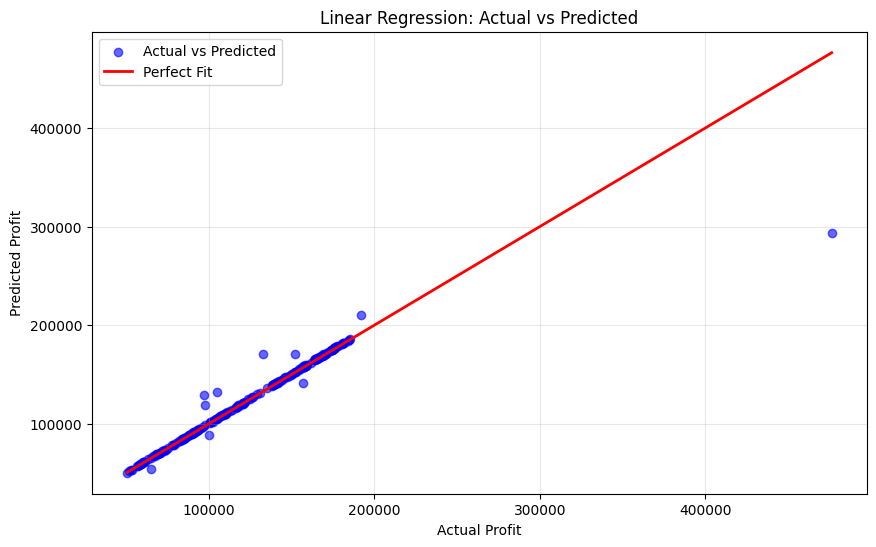

In [44]:
# Basic Linear Regression Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

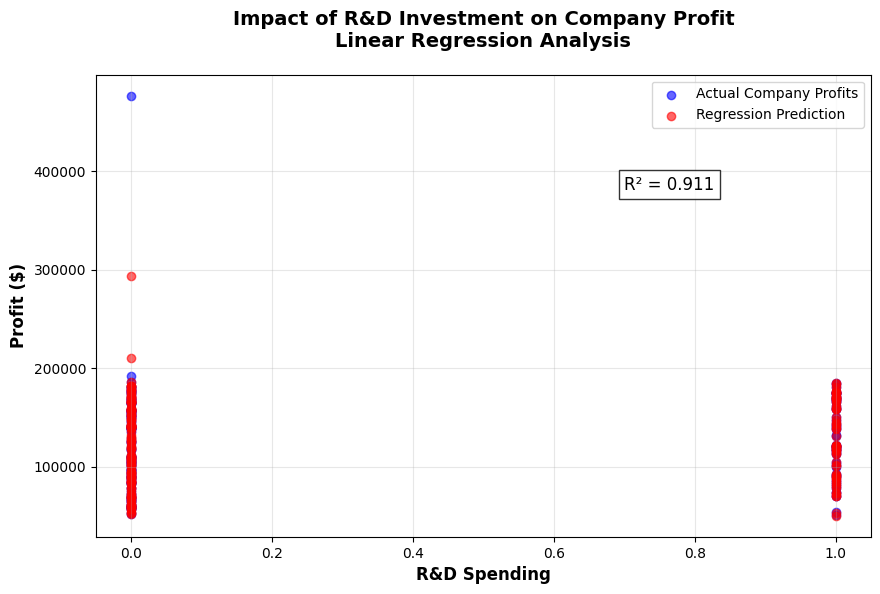

In [59]:
# For multiple regression, plot against one feature at a time
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 0], y_test, color='blue', alpha=0.6, label='Actual Company Profits')  # First feature in test set
plt.scatter(x_test[:, 0], y_pred, color='red', alpha=0.6, label='Regression Prediction')
plt.xlabel('R&D Spending', fontsize=12, fontweight='bold')
plt.ylabel('Profit ($)', fontsize=12, fontweight='bold')
plt.title('Impact of R&D Investment on Company Profit\nLinear Regression Analysis', fontsize=14, fontweight='bold', pad=20)
plt.legend()
plt.grid(True, alpha=0.3)

# Add R-squared value for credibility
# Position based on actual data coordinates
x_pos = np.max(x_test[:, 0]) * 0.7  # 70% across x-axis
y_pos = np.max(y_test) * 0.8        # 80% up y-axis

plt.text(x_pos, y_pos, f'R² = {r2:.3f}', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.show()